In [1]:
import os 
import re
import pickle
import collections
import sklearn 

import skimage.io
import skimage.color
import skimage.feature
import skimage.transform

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from glob import glob
from sklearn import metrics
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
# Load the data 

In [5]:
data = pickle.load(open('data_animals_head_20.pickle','rb'))
data.keys()

dict_keys(['description', 'data', 'target', 'labels'])

In [6]:
data['description']

'There are 20 classes and 2023 images of size 80x80x3'

In [7]:
#split the data 
X = data['data']
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y )

In [10]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((1618, 80, 80, 3), (405, 80, 80, 3), 1618, 405)

In [11]:
# Feature Extraction 

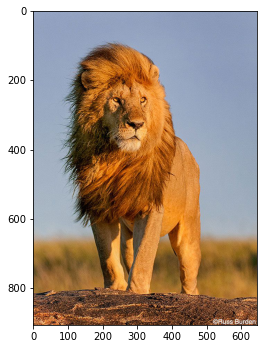

In [15]:
img = skimage.io.imread('images/lion.bmp')
plt.figure(figsize=(4,6))
plt.imshow(img)

In [27]:
# hog transform
img_re = skimage.transform.rescale(img, 1/3, multichannel=True)
gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(
    gray,
    orientations=9,
    pixels_per_cell=(14, 14),
    cells_per_block=(2, 2),
    visualize=True,)

In [29]:
print(len(feature_vector))
print(gray.shape, gray.shape[0]*gray.shape[1])

10080
(302, 215) 64930


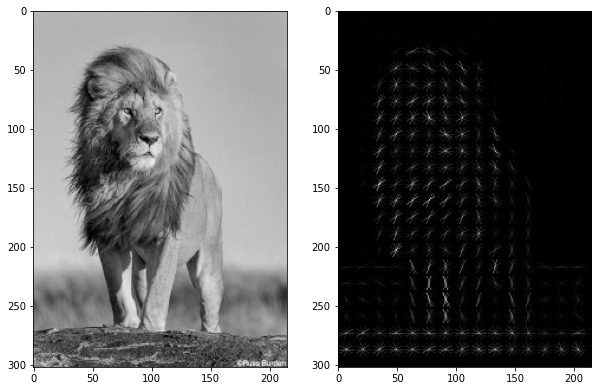

In [35]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,15))
ax1.imshow(gray, cmap='gray')
ax2.imshow(hog_img, cmap='gray')